<a href="https://colab.research.google.com/github/katildah/katildah/blob/main/C%C3%B3digo_de_R_a_python_Econometr%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hilda Núñez | Emilia Sepúlveda- Ingenería en Estadística

Conversión archivo R a Python
Seminario de Econometría

25|03|2024

In [13]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt #Librería que nos permite gráficar, plt nos permite llamar sus funciones de manera abreviada
import seaborn as sns
import inspect
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [9]:
#Importar datos

#Desde Jupyter Notebook
#AirP = pd.read_csv('C:/Users/Usuario/Desktop/econometria/AirPassengers.csv')#Diferentes tipos de "read..." según el archivo

#Desde Colab.se debe subir el archivo a la carpeta content.
AirP=  pd.read_csv('/content/AirPassengers.csv')


In [10]:
#Revisamos los primeros datos con head()
AirP.head()

,Unnamed: 0,x
0,1,112
1,2,118
2,3,132
3,4,129
4,5,121


In [11]:
#Revisamos  el tipo de dato que se importo y columnas, además de los nombres
type(AirP)#Clase de objeto
print(AirP.dtypes) #Tipo de variable
print(AirP.columns) #otro modo de tipo de variable

Unnamed: 0    int64
x             int64
dtype: object
Index(['Unnamed: 0', 'x'], dtype='object')


In [24]:

# Crear un rango de fechas mensuales originales
fechas = pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS')

# Crear un DataFrame con esas fechas
df = pd.DataFrame(data=fechas,columns=['year'])

# Agregar la columna de pasajeros al DataFrame
df['passengers'] = list(AirP['x'] )

#Creando respaldo
df1=df
# Cambiando de columna a index
df = df.set_index('year')
df.index #Revisando que index sea un datatime para facilitar el uso como serie temporal


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='year', length=144, freq=None)

In [ ]:
# chequeando valores nulos
df.isnull().sum()

passengers    0
dtype: int64

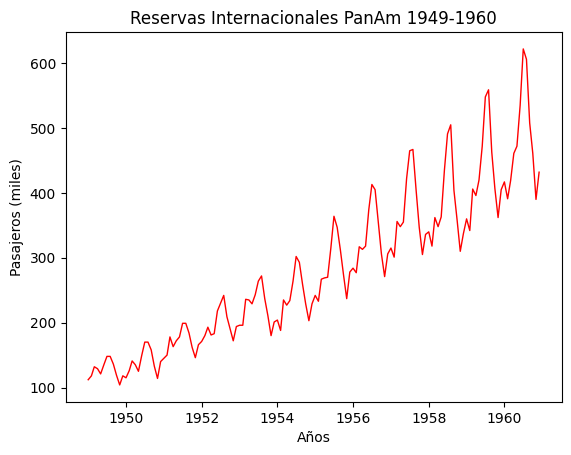

In [ ]:
#Gráficando la Serie

plt.plot(df['passengers'],
         linewidth=1 #Grosor de línea
         ,color='r' #Color de línea

         )
plt.xlabel('Años') #Etiqueta x
plt.ylabel('Pasajeros (miles)') #Etiqueta y
plt.title('Reservas Internacionales PanAm 1949-1960') #titulo
plt.show() #La salida se ve más limpia podemos especificar gráficos si asignamos nombres a varios y solo queremos ver algunos

El gráfico mostrado recientemente, se da tras descargar los datos desde R como archivo excel al computador de uso y luego importarlo a Python.

### Guardar los datos desde R

```{r}
library(base)

ruta_archivo <- file.path("C:/Users/Usuario/Desktop/econometria", "AirPassengers.csv")

write.csv(AP, file = ruta_archivo, row.names = T)

```
Cargamos la base de datos, la cual contiene información mensual sobre el número de pasajeros de aerolíneas internacionales, desde enero de 1949 hasta diciembre de 1960. Revisamos los primeros 5 valores, aunque pueden ser menos o más según el elemento dentro de head(), por defecto se  muestran 5.

La cargamos en el argumento "AirP" donde luego al utilizar diferentes comandos vemos que el formato de esta base y de sus columnas, las columnas son del tipo númerico, luego se crea un data frame que contenga las fechas originales y esta colunma sea del tipo *datatime* ya que son datos indexados en el tiempo. Se convierte la columnas de fecha a un index con nombre *year*. Posteriormente es graficada la base.


In [ ]:
#Revisión de caracteristicas de la serie en general
print(df.shape)#Dimensones
print(df.describe(include = 'all'))# describiendo la data para comprender
print(f'Time period start : {df.index.min()}\nTime period end : {df.index.max()}') #Verificando el marco temporal

(144, 1)
       passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
Time period start : 1949-01-01 00:00:00
Time period end : 1960-12-01 00:00:00


In [ ]:
#Agrupar tus datos por una frecuencia temporal, como meses o años, y luego aplicar una función de agregación, como la media:
# df.resample('Y').sum() , Y:year, M:month, D:day
# Agrupar las ventas por mes y calcular la suma, considerando el index como fecha por defecto
#print(df.resample('Y').sum())
# Agrupar las ventas por mes y calcular la suma cuando index es otra columna
#print(df1.resample('Y', on='year').sum())

#Crea un elemento que contenta el total de pasajeros por año
agrr=df1.resample('Y', on='year').sum()

# Agregar la columna de meses al DataFrame
df1['month'] = list(df1['year'].dt.month)

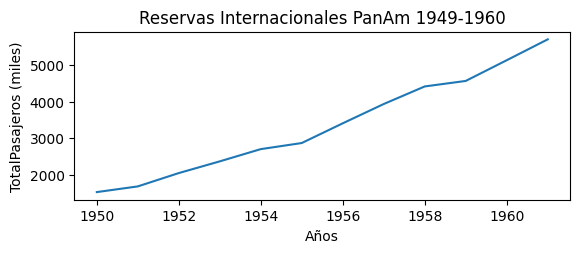

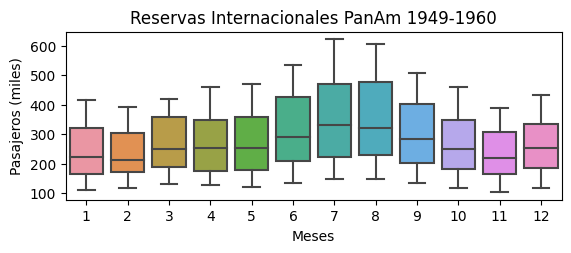

In [ ]:


#Gráficando total por año y por mes en boxplot

#plt.figure() # El mecanismo de diseño para posicionar
#los elementos de la trama para evitar la superposición de decoraciones de ejes (etiquetas, ticks, etc.).
plt.subplot(211)#Para el plot indica que sea el elemento superior
plt.plot(agrr)
plt.xlabel('Años') #Etiqueta x
plt.ylabel('TotalPasajeros (miles)') #Etiqueta y
plt.title('Reservas Internacionales PanAm 1949-1960') #titulo

plt.show() #La salida se ve más limpia podemos especificar gráficos si asignamos nombres a varios y solo queremos ver alguno
plt.subplot(212)#Para boxplot indicando que sea el elemento de abajo
sns.boxplot(x = df1.month, y = df1.passengers,data=df1)
plt.xlabel('Meses') #Etiqueta x
plt.ylabel('Pasajeros (miles)') #Etiqueta y
plt.title('Reservas Internacionales PanAm 1949-1960') #titulo
plt.show() #La salida se ve más limpia podemos especificar gráficos si asignamos nombres a varios y solo queremos ver alguno
plt.show()

Utilizamos ***subplot***  para dividir la zona de que muestra nuestros "plots", en dos diferentes paneles, debemos agregar indicaciones.

El comando ***df1.resample('Y', on='year').sum()*** para que nos muestre la cantidad por año en miles de pasajeros. Gráficamos con ***plt.plot*** , podemos observar una tendencia creciente en el número de pasajeros.

Para el boxplot se creo una nueva columna meses con ***df1['year'].dt.month*** que contenga el mes de la observación.
***boxplot(x = df1.month, y = df1.passengers,data=df1)*** lo que muestra este código, es un gráfico de cajón y bigotes de los números mensuales de pasajeros de todos los años considerados, es decir que podemos observar, por ejemplo, que el primer cajón y bigote corresponde el número de pasajeros de la aerolínea en el mes de enero entre 1949 y 1960. Una conclusión que podemos deducir a simple vista con este gráfico, es que entre junio y septiembre es donde a través de todos los años la media de número de pasajeros es mayor a los demás, sin embargo, es donde más se presenta dispersión en los datos.

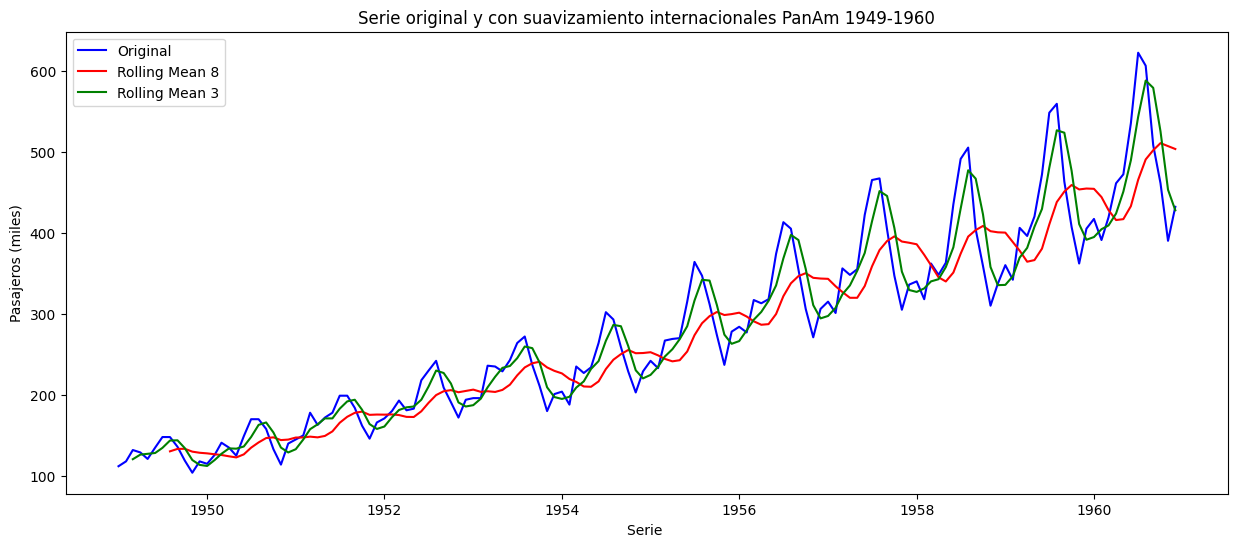

In [26]:
#Suavizamiento Media Móvil

#Para verificar estructura de funciones por ejemplo de rolling:

source_code = inspect.getsource(pd.DataFrame.rolling)
print(source_code)

# Media Movil
rolmean = df.rolling(8).mean()#Ventana a 8 meses
rolmean3 = df.rolling(3).mean()#Ventana a 12 meses

plt.figure(figsize = (15,6)) #Otra configuración para los margenes.
orig = plt.plot(df, color = 'blue', label ='Original') #Gráfico de la serie
mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean 8')
mean3  = plt.plot(rolmean3, color = 'green', label = 'Rolling Mean 3')
plt.xlabel('Serie ') #Etiqueta x
plt.ylabel('Pasajeros (miles)') #Etiqueta y
plt.title('Serie original y con suavizamiento internacionales PanAm 1949-1960') #titulo
plt.legend(loc = 'best')
plt.show() #Mostrara las figuras que contengan plt

C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


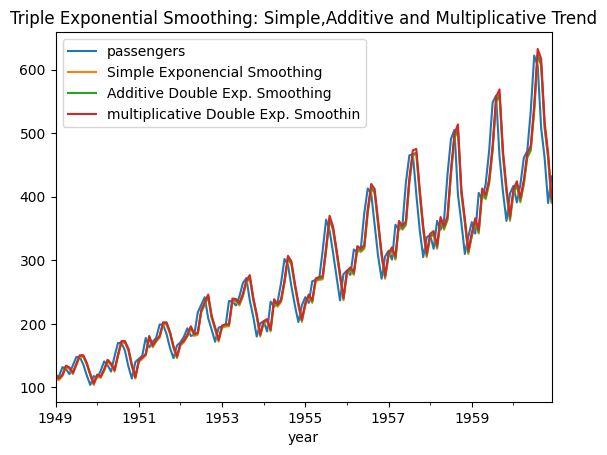

In [ ]:
#Suavizamiento Exponencial

#Posteriormente aplicamos nuevamente la serie de tiempo

#Aplicación de suavizamineto
HWES1 = SimpleExpSmoothing(df, initialization_method="estimated").fit()
HWES2_ADD = ExponentialSmoothing(df,trend='add').fit()#.fittedvalues
HWES2_MUL = ExponentialSmoothing(df,trend='mul').fit()#.fittedvalues

#Especificamos la componente de fit a gráficar
HWES1_fitted = HWES1.fittedvalues
HWES2_ADD_fitted = HWES2_ADD.fittedvalues
HWES2_MUL_fitted = HWES2_MUL.fittedvalues

#Nombres
HWES1_fitted.name = 'Simple Exponencial Smoothing'
HWES2_ADD_fitted.name = 'Additive Double Exp. Smoothing'
HWES2_MUL_fitted.name = 'multiplicative Double Exp. Smoothin'

#Concatenado los gráficos
pd.concat([df,HWES1_fitted, HWES2_ADD_fitted, HWES2_MUL_fitted], axis=1).plot(title='Triple Exponential Smoothing: Simple,Additive and Multiplicative Trend');


El suavizamiento exponencial es una técnica comúnmente utilizada para suavizar series temporales. En este método, se asigna un mayor peso a los puntos de datos más recientes que a los puntos de datos más antiguos. Esto se logra mediante la aplicación de un factor de suavizado exponencial a cada observación, lo que hace que los valores más recientes influyan más en la estimación suavizada que los valores más antiguos.

El suavizamiento exponencial puede ser simple o doble, dependiendo de si se considera una o dos fuentes de error, tambien puede ser del tipo aditivo o multiplicativo.El suavizamiento simple se puede aplicar a la serie: ***SimpleExpSmoothing(df, initialization_method="estimated")***

Suavizamiento Exponencial Aditivo:

*   En el suavizamiento exponencial aditivo, la serie temporal se modela como la ***suma*** de tres componentes: nivel, tendencia y estacionalidad. Se utilizó ***ExponentialSmoothing(df,trend='add')***

Suavizamiento Exponencial Multiplicativo:
*   En el suavizamiento exponencial multiplicativo, la serie temporal se modela como el ***producto*** de tres componentes: nivel, tendencia y estacionalidad. Se utilizó ***ExponentialSmoothing(df,trend='mul')***

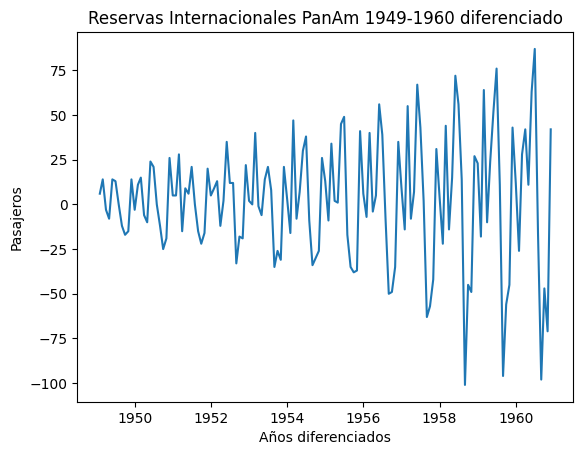

In [ ]:
#Diferenciación

df_diff = df - df.shift(periods = 1) #Primera diferenciación

plt.plot(df_diff)
plt.xlabel('Años diferenciados') #Etiqueta x
plt.ylabel('Pasajeros') #Etiqueta y
plt.title('Reservas Internacionales PanAm 1949-1960 diferenciado') #titulo
plt.show() #La salida se ve más limpia podemos especificar gráficos si asignamos nombres a varios y solo queremos ver alguno

Realizamos una diferenciación de la series, donde en este caso es de primer orden, es decir tendremos lo siguiente:

**Y\_t - Y\_t-1**

Esto puede ser realizado con diferentes finalidades, como por ejemplo, con el fin de solucionar el problema de no estacionaridad en algunas series temporales. Sin embargo, la utilización de este tipo de diferenciaciones dependerá sustancialmente de la naturaleza de los datos entregados.

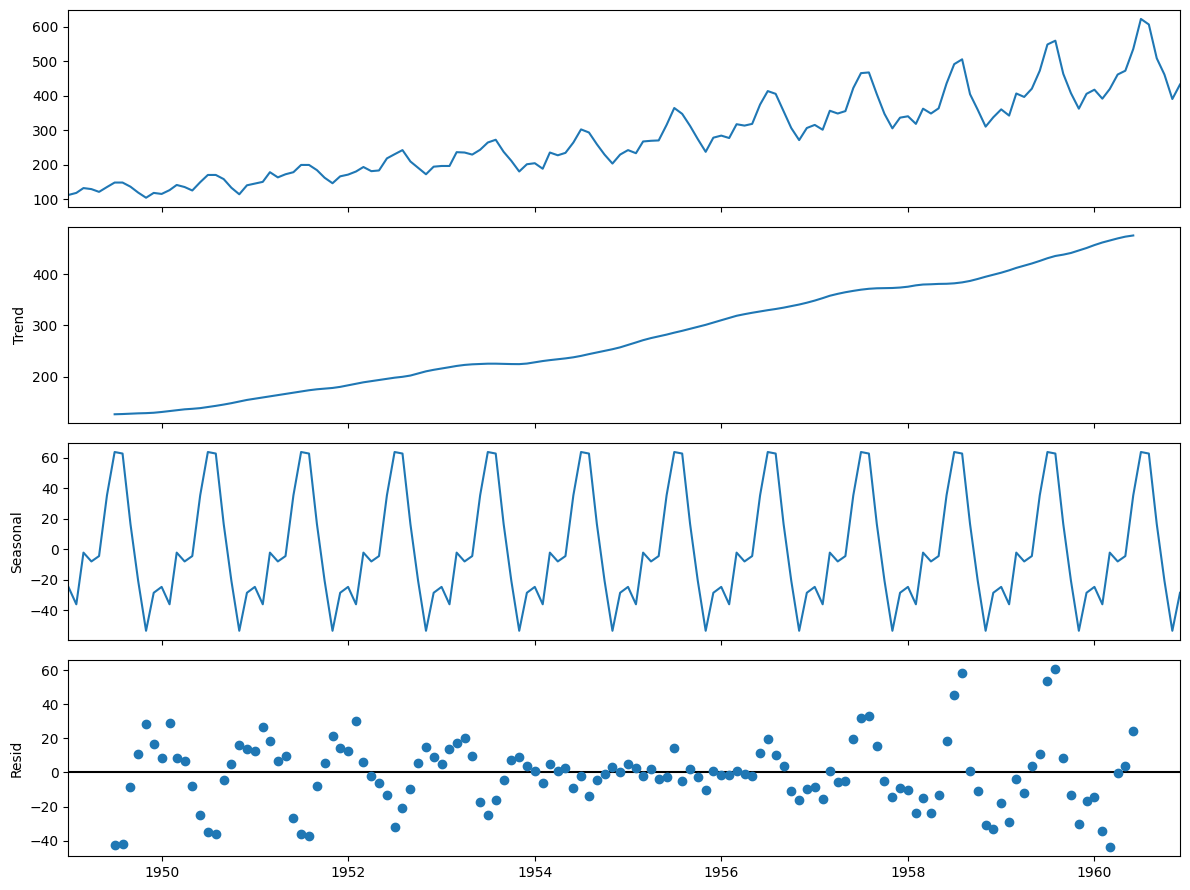

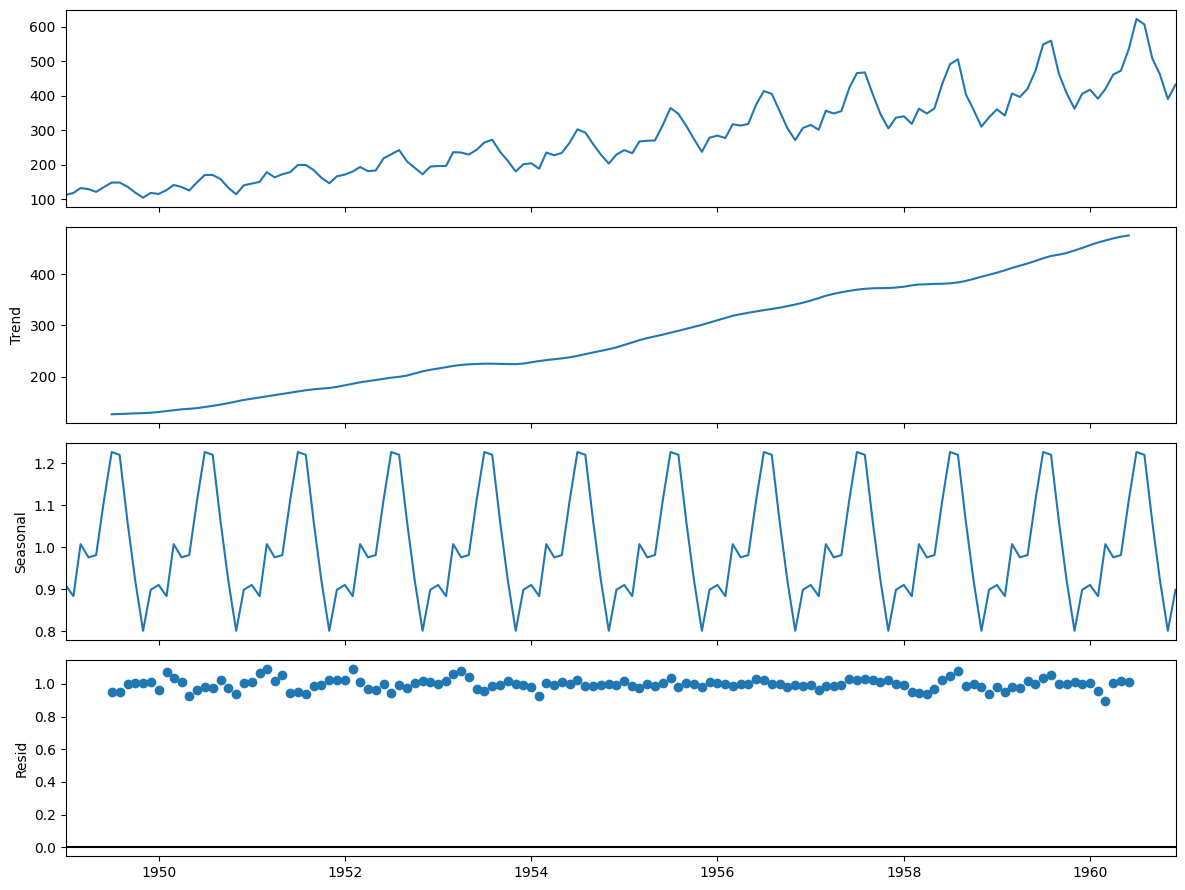

In [ ]:
#Descomposición Serie de Tiempo

#```{r}
###Forma 1##
#plot(decompose(AP))
#
###Forma 2##
#AP.decom <-decompose(AP, type = "mult")
#plot(AP.decom)
#
###Gr?fica Tendencia y Componente Estacional##
#Trend <- AP.decom$trend
#Seasonal <- AP.decom$seasonal
#ts.plot(cbind(Trend, Trend * Seasonal), lty = 1:2)
#```

decomp = seasonal_decompose(df,model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches((12, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

decomp = seasonal_decompose(df,model='multiplicative', period=12)
fig = decomp.plot()
fig.set_size_inches((12, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
En este apartado podemos ver la descomposicións aditiva de la serie de tiempo, donde es presentada los datos observado o serie historica, la tendencia, la estacionalidad de la serie y tambien la parte aleatoria de la misma. Luego es mostrada la descomposición multiplicativa de la serie, mostrando lo mismo mencionado anteriormente.

Luego vemos lo siguiente

```{r}
Trend <- AP.decom$trend
Seasonal <- AP.decom$seasonal
ts.plot(cbind(Trend, Trend * Seasonal), lty = 1:2)
```

donde $\textit{ploteamos}$ la tendencia y la estacionalidad de la serie.



...........


...........




$\textbf{Predicciones}$

Cargaremos la librerias necesarias para realizar las predicciones

```{r}
library(forecast)
library(xtable)
```

```{r}
TIME<-time(AP)
TIME
It.trig<-fourier(AP,2)
head(It.trig)
model2<-lm(log(AP)~TIME + It.trig)
summary(model2)
```

Realizamos lo siguiente:

1-.Creamos una variable que guarda el tiempo de la serie
2-.Con $\texttt{It.trig<-fourier(AP,2)}$ convertimos la serie de tiempo en una suma de funciones de seno y cosenos, los cuales son llamados armonicos
2-. Realizamos una serie de tiempo con variable dependiente el logaritmo de la serie de tiempo y la realizamos a traves del tiempo obtenido con anterioridad y la suma de funciones mencionada.

```{r}
print(xtable(model2),digits=6)

```

podemos ver los resulamos del modelo como latex.

```{r}
t<-time(AP)
SIN<-COS<-matrix(0, ncol=6, nrow=144)
for(i in 1:6){
SIN[,i]<-sin(2*pi*i*t)
COS[,i]<-cos(2*pi*i*t)
}

model.AP<-lm(AP~t+t^2+t^3+t^4+SIN[,1]+COS[,1]+SIN[,2]+
COS[,2]+SIN[,3]+COS[,3]+SIN[,4]+COS[,4]+SIN[,5]+
COS[,5]+SIN[,6]+COS[,6])

summary(model.AP)
ajust<-ts(model.AP$fitted.values, start=1949, freq=12)
plot(AP);lines(ajust,col=2)

res.AP<-model.AP$residuals
ts.plot(res.AP)
acf(res.AP,lag=50)

```

Se realiza un ajuste a través de una regresión armonica, con las funciones de seno y coceno.

En "ajust" creamos una serie de tiempo con los valores ajustados, iniciando en 1949 y especificando que los periodos son mensuales.

Ploteamos la serie hisotirca y  el ajuste realizado con una línea roja

```{r}
res.AP<-model.AP$residuals
ts.plot(res.AP)
acf(res.AP,lag=50)
```

En este apartado observamos los residuos del modelo y ploteamos los mismos.

Si observamos el gráfico entregado por $texttt{ts.plot(res.AP)}$ veremos que hay problemas con el tiempo entregado en la coordenada x. Para arreglar esto podemos hacer lo siguiente:

```{r}
res.AP<-model.AP$residuals
res.AP<- ts(res.AP,start=1949,freq=12)
plot(res.AP)
```

Luego con $\texttt{acf(res.AP,lag=50)}$ vemos el gráfico de autocorrelación, con un máximo de 50 lags, es decir 50 retrasos. Con esto podemos ver si $Y_t$ se correlaciona con una valor de $Y_{t-k}$ siendo k el lag que queremos observar.

```{r}
res2<-model2$residuals
ajustados2<-ts(model2$fitted.values, start=c(1949,1), freq=12)

plot(AP)
lines(exp(ajustados2), col=2)
```

Con $\texttt{res2<-model2\$residuals}$ los residuos de la estimación del modelo, donde posteriormente podríamos realizar un análisis de residuos, observando la correlación de los mismos, la media, la heteroscedasticidad, entre otras cosas.

Luego ploteamos los datos de la serie histórica y vemos con una línea roja (especificado con $\texttt{col=2}$) el ajuste realizado . Como podemos observar, usamos la exponencial de los datos ajustados, ya que, anteriormente, utilizamos el logaritmo para ayustar la serie.

```{r}
TTP.F<-fourier(AP, 2, 24)
t2<-time(ts(start=c(1961,1), end=c(1962,12), fr=12))
TIME2<-time(t2)

data_Pred<-data.frame(TIME=TIME2, It.trig=I(TTP.F))
data_Pred
prons.vt<-ts(predict(model2, data_Pred),start=1961, fr=12)

ts.plot(AP,exp(prons.vt), lty=1:2,lwd=2:2)

```

Primero con $\texttt{TTP.F<-fourier(AP, 2, 24)}$ realizamos nuevamente ajustamos a través de una modelo de Fourier, sin embargo en este caso, especificamos que queremos ajustar el modelo para dos año luego de ls datos de 1960.

obtenemos tiempo de una serie temporal que inicia en enero de 1961 hasta diciembre de 1962, con datos mensuales.

En un data frame guardamos los valores para posteriormente predecir, donde con $\texttt{I(TTP.F)}$ especificamos que TTP.F es un valor independiente al modelo propuesto

Creamos prons.vt guardamos la predicción que deseamos realizar, comenzando desde 1961, con datos mensuales.

 $\texttt{predict((model2, data_Pred))}$ expecificamos el modelo ajustado con el que llevaremos a cabo la predicción y el conjunto de datos que se realizaran las mismas.

Finalmente, ploteamos la serie de tiempo histórica junto a los valores predichos, donde especificamos el tipo de línea y su grosor con lwd y lty respectivamente.